# Practice Assessment Task — Museum Heist Detector
**Scenario**

The National Tech Museum is launching a new high-value exhibition, “Treasures of the Future.”
You are part of the IoT Security Engineering team responsible for developing a smart motion detection system that can protect the artifacts after hours.

Your system, called the Museum Heist Detector, must use a PIR motion sensor, an LED, and a buzzer connected to a Raspberry Pi Pico W.

The system should:

- Detect motion using the PIR sensor.
- Trigger both a visual alarm (LED blinking) and an audible alarm (buzzer) when armed.
- Allow museum guards to control the system from the terminal `ARM`, `DISARM`, `MUTE`, `UNMUTE`, and `STATUS` commands.
- Keep the system responsive to user input without freezing during continuous motion detection.

You have been provided with a **partially completed** MicroPython program.
Your task is to complete and test the code, ensuring all required features work correctly.


### Hardware Requirements:
- Raspberry Pi Pico
- PIR Sensor
- LED light (RED)
- Buzzer 
- Breadboard
- Jumper wire

### Task Overview

You will complete and test the MicroPython program so that:

1. The system can be `Armed` and `Disarmed` via *terminal commands*.
2. When armed and motion is detected, the `LED blinks` and the `buzzer sounds`.
3. The `MUTE` option silences the buzzer while *keeping the LED blinking*.
4. The `STATUS` command displays the live system state and *PIR sensor value*.



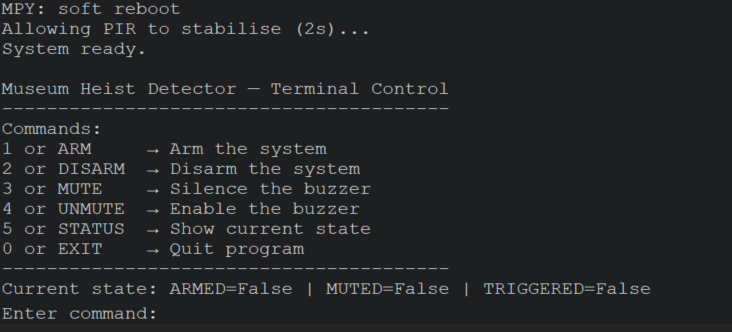



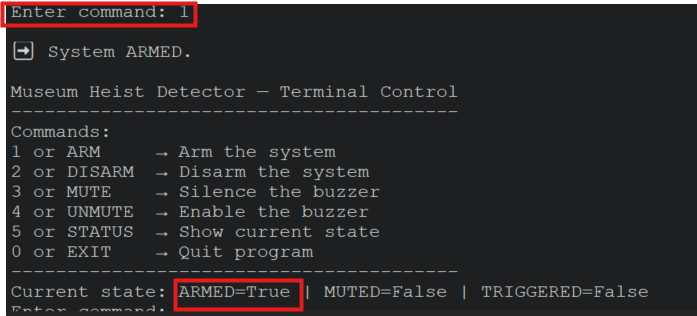


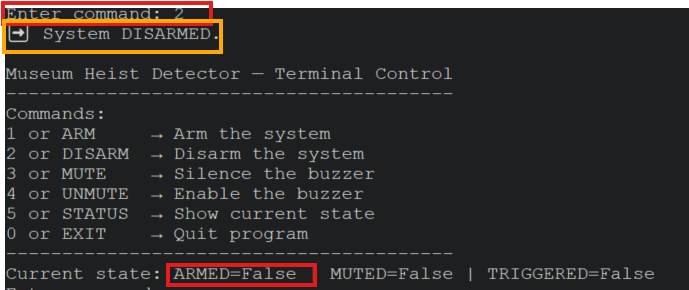



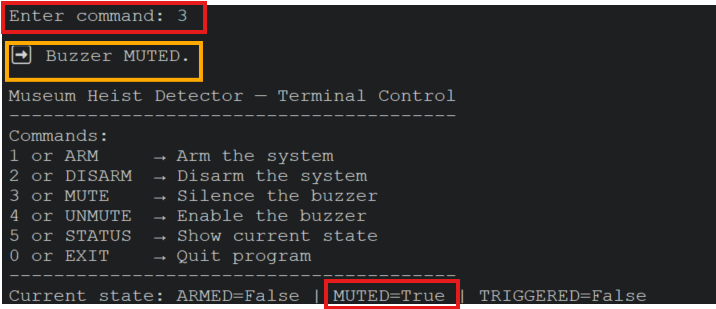

```python


# Import necessary libraries for hardware control and I/O
from machine import Pin, PWM
from time import sleep
import sys
import select   # For non-blocking keyboard input

# --- Hardware Setup ---
# PIR drives its own output; no internal pull-up/down needed
PIR = Pin(14, Pin.IN)      # PIR motion sensor on GPIO14
LED = Pin(15, Pin.OUT)     # LED indicator on GPIO15
BUZZER = PWM(Pin(16))      # PWM buzzer on GPIO16

# Initialise the buzzer (start silent)
BUZZER.freq(1000)
BUZZER.duty_u16(0)

# --- State Variables ---
ARMED = False              # Whether system is armed
MUTED = False              # Whether buzzer is silenced
ALARM_TRIGGERED = False    # Keeps alarm latched once motion is detected

# --- Functions ---

def BUZZER_ON():
    """Turn the buzzer ON if the system is not muted."""
   

def BUZZER_OFF():
    """Turn the buzzer OFF."""
   

def DISARM_SYSTEM():
    """
    Disarm the system completely.
    Turns off LED and buzzer,
    resets alarm state and ARMED flag.
    """
    global ARMED, ALARM_TRIGGERED
    ARMED = False
    ALARM_TRIGGERED = False
    
    print("➡ System DISARMED.")

def Blink():
    """Flash the LED for visual alert when alarm is triggered."""
   

def print_menu():
    """Display available commands and system status."""
    print("\nMuseum Heist Detector — Terminal Control")
    print("----------------------------------------")
    print("Commands:")
    print("1 or ARM     → Arm the system")
    print("2 or DISARM  → Disarm the system")
    print("3 or MUTE    → Silence the buzzer")
    print("4 or UNMUTE  → Enable the buzzer")
    print("5 or STATUS  → Show current state")
    print("0 or EXIT    → Quit program")
    print("----------------------------------------")
    print(f"Current state: ARMED={ARMED} | MUTED={MUTED} | TRIGGERED={ALARM_TRIGGERED}")
    print("Enter command: ", end="")  # Keep cursor on the same line for live input

# --- Non-blocking input setup ---
# 'poll_obj' checks if the user typed something without freezing the loop.
poll_obj = select.poll()
poll_obj.register(sys.stdin, select.POLLIN)
user_input = ""  # To store characters typed by user

# --- Main Program ---
print("Allowing PIR to stabilise (2s)...")
sleep(2)  # Allow PIR module to warm up and stabilise
print("System ready.")
print_menu()

try:
    while True:
        # --- 1. Motion Detection (the trigger) ---
        # Only check PIR when system is armed and alarm not yet been triggered
       

        # --- 2. Handle Active Alarm ---
        # If alarm has been triggered, continuously blink LED and sound the buzzer
       

        # --- 3. Handle User Input (Non-blocking) ---
        # poll_obj.poll(0) returns immediately; it doesn’t stop the loop
        if poll_obj.poll(0):
            char = sys.stdin.read(1)  # Read one character at a time

            # When user presses Enter, process the full command
            if char == '\n':
                cmd = user_input.strip().upper()  # Clean and capitalize input
                user_input = ""  # Clear buffer for next command

                # --- Command Handling ---
                if cmd in ("1", "ARM"):
                    ARMED = True
                    print("\n➡ System ARMED.")

                elif cmd in ("2", "DISARM"):
                   

                elif cmd in ("3", "MUTE"):
                    
                    print("\n➡ Buzzer MUTED.")

                elif cmd in ("4", "UNMUTE"):
                    
                    print("\n➡ Buzzer UNMUTED.")

                elif cmd in ("5", "STATUS"):
                    # Show live system status and current PIR value
                  
                    print(f"\n STATUS → ARMED={ARMED}, MUTED={MUTED}, TRIGGERED={ALARM_TRIGGERED}, MOTION_NOW={motion_now}")

                elif cmd in ("0", "EXIT", "QUIT"):
                    print("\n Exiting program...")
                    break

                else:
                    # Handle invalid or empty inputs gracefully
                    if cmd:
                        print("\n Unknown command. Try again.")

                # Reprint menu after each command
                print_menu()

            else:
                # Build command one character at a time until Enter is pressed
                user_input += char
        
        # Small delay to prevent CPU overuse and allow smooth LED flashing
        sleep(0.05)

except KeyboardInterrupt:
    # Gracefully exit when user presses Ctrl+C
    print("\n Exiting (KeyboardInterrupt).")

finally:
    # Ensure all hardware outputs are turned off before exit
    DISARM_SYSTEM()
    print("System shut down cleanly.")


```



